<a href="https://colab.research.google.com/github/Rahilzakir/Global_terorism_EDA/blob/main/Capstone_Project_Global_terrorism_EDA_by_Rahil_Shaikh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name- EDA on Global Terrorism Database**
## Contribution type: Individual

#**Project Summary**

The Global Terrorism Data Set is a comprehensive collection of information on terrorism incidents from around the world. The data set includes information on the date and location of the incident, the number of casualties, the type of attack, and the motivations behind the attack, among other variables.

The data set has been collected over several decades and covers a wide range of terrorist incidents, including bombings, assassinations, hijackings, and kidnappings. It is an invaluable resource for researchers, policy-makers, and analysts who are interested in studying terrorism and its causes and effects. to calculate the data sets and the posible outcome i have process the data in order to get much information possible, this operation is done on the bases of and organisation which analysis the data world wide and get to know the most of the best insights from the data , we process the data into following steps and pre processing steps where missing and the null values replaced. i trired to make the data as origanal as posible and didnt temper that much. we see this data as per the global watch and trying to find the valuable inputs we first see the region wise imact of terroris, and see the higly effacted countries and thier cities, then, we have more attribites which show us the deaths faced by countries and people who got wouned next we have the majorly impact groups with terrorism, the dead people come from the majorly which specific area, after this we will have an look on the type of attack happend by the mode, weather its a suicide or its a assault attack, next to this we will see the aspects according to the india domain the loss of the india and its neighbour most of the graph type is bar due to comparison mode. why so much bar graphs: Bar graphs are used to represent and compare categorical data. They are often used to display the frequency or count of items within a category. For example, you can use a bar graph to show the number of people who belong to different age groups, the number of products sold in different categories, or the number of students who scored a certain range of marks in an exam.

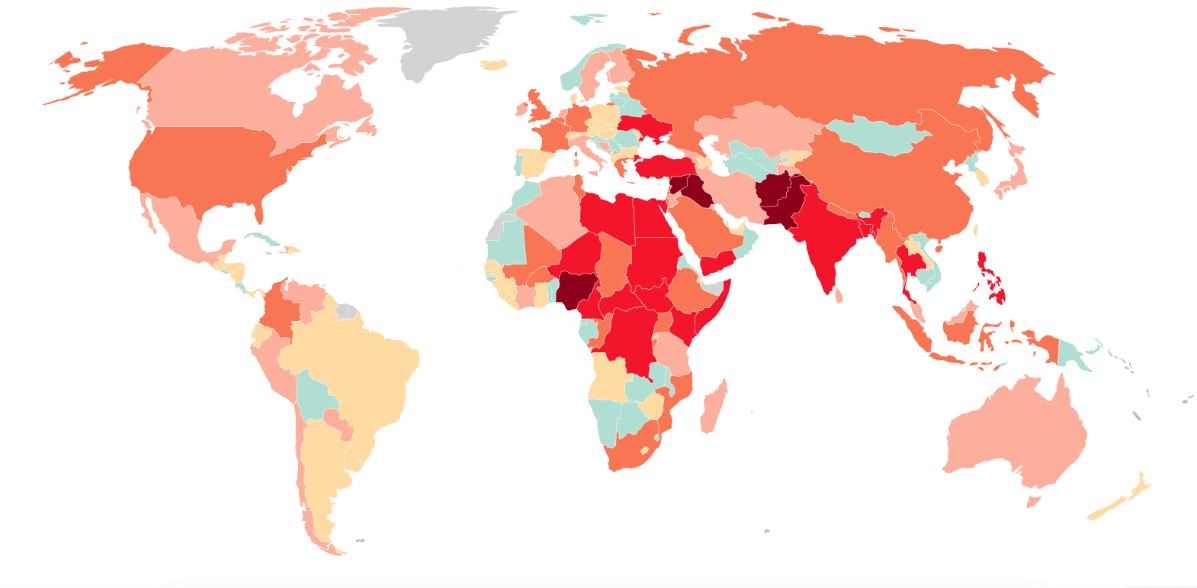

*The above image not a part of EDA visualisation.*

*Areas where terrorism-related activities are most intensive. The darker the red, the more affected the country.*
*Image refrence: https://www.geospatialworld.net/blogs/maps-of-global-terrorism/*

## **Github Link**
https://github.com/Rahilzakir/Global_terorism_EDA/blob/main/Capstone_Project_Global_terrorism_EDA_by_Rahil_Shaikh.ipynb

#**Lets Begin !**

##**1.Know Your Data**

###Import Libraries

This code imports the necessary libraries for data analysis and visualization, including:

Pandas for data manipulation and analysis numpy for numerical operations

Matplotlib.pyplot for plotting and visualization.

Seaborn for higher level visualization

It also suppresses warnings and mounts Google Drive to access files stored there

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
%matplotlib inline
import math
from wordcloud import WordCloud
from google.colab import drive

In [2]:
# Mount drive
drive.mount('/content/drive')

# Retrieve data from csv file
filepath = '/content/drive/MyDrive/DataSet/Global Terrorism Data.csv'
globa_terr_data = pd.read_csv(filepath, encoding='latin1', low_memory=False)

# Create dataframe
gt_df = pd.DataFrame(globa_terr_data)


Mounted at /content/drive


In [3]:
gt_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN



# ***This EDA project is made by Rahil Shaikh***

# **Explore and analyze the data to discover key findings pertaining to terrorist activities.**

**Understanding of Data**

In [8]:
gt_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [9]:
gt_df.shape

(181691, 135)

There are total 181691 Rows And 135 Columns in the DataFrame

In [10]:
list(gt_df.columns)

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

In [11]:
gt_df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


The .describe() method in pandas is used to generate descriptive statistics of a DataFrame. It provides various statistical measures for each numerical column in the DataFrame, such as count, mean, standard deviation, minimum, quartiles like 25%, 50%, 75%, and maximum values.

# **Finding the percentage of missing values columns wise**

In [12]:
#To get the percentage of null values each column wise
missingvalues_percentage = gt_df.isna().sum().sort_values(ascending= False)/len(gt_df)
missingvalues_percentage

gsubname3           0.999890
weapsubtype4_txt    0.999615
weapsubtype4        0.999615
weaptype4           0.999598
weaptype4_txt       0.999598
                      ...   
suicide             0.000000
success             0.000000
crit3               0.000000
property            0.000000
eventid             0.000000
Length: 135, dtype: float64

# **Data Cleaning**

In [13]:
# Finding the columns that have more than 15% missing values
drop_columns_list = list(missingvalues_percentage[missingvalues_percentage>0.15].index.values)
drop_columns_list

['gsubname3',
 'weapsubtype4_txt',
 'weapsubtype4',
 'weaptype4',
 'weaptype4_txt',
 'claimmode3',
 'claimmode3_txt',
 'gsubname2',
 'claim3',
 'guncertain3',
 'gname3',
 'divert',
 'attacktype3',
 'attacktype3_txt',
 'ransomnote',
 'ransompaidus',
 'ransomamtus',
 'claimmode2',
 'claimmode2_txt',
 'ransompaid',
 'corp3',
 'targsubtype3',
 'targsubtype3_txt',
 'natlty3_txt',
 'natlty3',
 'target3',
 'targtype3',
 'targtype3_txt',
 'ransomamt',
 'weapsubtype3_txt',
 'weapsubtype3',
 'weaptype3_txt',
 'weaptype3',
 'claim2',
 'guncertain2',
 'gname2',
 'resolution',
 'kidhijcountry',
 'nhours',
 'compclaim',
 'gsubname',
 'attacktype2',
 'attacktype2_txt',
 'ndays',
 'approxdate',
 'corp2',
 'nreleased',
 'targsubtype2',
 'targsubtype2_txt',
 'natlty2',
 'natlty2_txt',
 'hostkidoutcome_txt',
 'hostkidoutcome',
 'target2',
 'targtype2_txt',
 'targtype2',
 'weapsubtype2',
 'weapsubtype2_txt',
 'weaptype2',
 'weaptype2_txt',
 'nhostkidus',
 'nhostkid',
 'claimmode_txt',
 'claimmode',
 'rela

So this is list of colums that have more then 15% missing values

In [14]:
# Dropping the Missing value columns from the data set
gt_df.drop(drop_columns_list,inplace=True,axis=1)
gt_df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1',
       'targsubtype1_txt', 'target1', 'natlty1', 'natlty1_txt', 'gname',
       'guncertain1', 'individual', 'weaptype1', 'weaptype1_txt',
       'weapsubtype1', 'weapsubtype1_txt', 'nkill', 'nwound', 'property',
       'ishostkid', 'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

In [15]:
gt_df.shape

(181691, 47)

In [16]:
# Exploring the remaining columns data for missing values
missingvalues_percentage = gt_df.isna().sum().sort_values(ascending= False)/len(gt_df) #To get the percentage of null values each column wise
missingvalues_percentage

weapsubtype1        0.114304
weapsubtype1_txt    0.114304
nwound              0.089773
targsubtype1_txt    0.057091
targsubtype1        0.057091
nkill               0.056761
longitude           0.025081
latitude            0.025076
natlty1             0.008581
natlty1_txt         0.008581
target1             0.003500
city                0.002389
provstate           0.002317
guncertain1         0.002091
ishostkid           0.000980
specificity         0.000033
doubtterr           0.000006
multiple            0.000006
individual          0.000000
INT_MISC            0.000000
gname               0.000000
weaptype1_txt       0.000000
weaptype1           0.000000
property            0.000000
INT_IDEO            0.000000
INT_LOG             0.000000
dbsource            0.000000
eventid             0.000000
attacktype1_txt     0.000000
targtype1_txt       0.000000
targtype1           0.000000
imonth              0.000000
iday                0.000000
extended            0.000000
country       

We will analyse following set of columns for our analysis:

Year, Month, Country, Region, State, City, ishostkid, Successs, Nationality of Casualty, Attack type, Target type, Weapon type, Killed, Wounded, Gang name.

In [17]:
gt_df.drop(columns={'eventid','extended','country','targsubtype1','region','weaptype1','weapsubtype1','specificity',
                  'vicinity','crit1','crit2','crit3','doubtterr','multiple','suicide','attacktype1','targtype1','targsubtype1_txt',
                  'target1','guncertain1','individual','weapsubtype1_txt','property','dbsource','INT_LOG','INT_IDEO',
                  'INT_MISC','INT_ANY'
                  },inplace=True,axis=1)

In [18]:

gt_df.shape

(181691, 19)

In [19]:
gt_df.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,success,attacktype1_txt,targtype1_txt,natlty1,natlty1_txt,gname,weaptype1_txt,nkill,nwound,ishostkid
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,Assassination,Private Citizens & Property,58.0,Dominican Republic,MANO-D,Unknown,1.0,0.0,0.0
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,1,Hostage Taking (Kidnapping),Government (Diplomatic),21.0,Belgium,23rd of September Communist League,Unknown,0.0,0.0,1.0
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,1,Assassination,Journalists & Media,217.0,United States,Unknown,Unknown,1.0,0.0,0.0
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,1,Bombing/Explosion,Government (Diplomatic),217.0,United States,Unknown,Explosives,NaN,NaN,0.0
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,Facility/Infrastructure Attack,Government (Diplomatic),217.0,United States,Unknown,Incendiary,NaN,NaN,0.0


# **Data Manipulation & Handling Missing Values :**

In [20]:
gt_df.rename(columns={"iyear":"Year","imonth":"Month","iday":"Day","country_txt":"Country",
                   "region_txt":"Region","provstate":"State","city":"City",
                   "latitude":"Latitude","longitude":"Longitude", 'success':'Success',"location":"Location",
                   "summary":"Summary","attacktype1_txt":"Attack_Type", 'targsubtype1_txt':'Target_subtype', "targtype1_txt":"Target_Type",
                   "gname":"Group_Name", 'natlty1_txt':'Nationality', "motive":"Motive","weaptype1_txt":"Weapon_Type",
                   "nkill":"Killed","nwound":"Wounded", 'ishostkid': 'Kid_hostage', "addnotes":"Add Notes"},inplace=True)



In [21]:
gt_df.columns

Index(['Year', 'Month', 'Day', 'Country', 'Region', 'State', 'City',
       'Latitude', 'Longitude', 'Success', 'Attack_Type', 'Target_Type',
       'natlty1', 'Nationality', 'Group_Name', 'Weapon_Type', 'Killed',
       'Wounded', 'Kid_hostage'],
      dtype='object')

In [22]:
gt_df.shape

(181691, 19)

In [23]:
gt_df['State']= gt_df['State'].fillna('Unknown')
gt_df['City']=gt_df['City'].fillna('Unknown')
gt_df['Target_Type']= gt_df['Target_Type'].fillna("Others")
gt_df['Killed']=gt_df['Killed'].fillna(0)
gt_df['Wounded']=gt_df['Wounded'].fillna(0)
gt_df['Casualty']=gt_df['Killed']+gt_df['Wounded']

In [24]:
gt_df.head()

,Year,Month,Day,Country,Region,State,City,Latitude,Longitude,Success,Attack_Type,Target_Type,natlty1,Nationality,Group_Name,Weapon_Type,Killed,Wounded,Kid_hostage,Casualty
0,1970,7,2,Dominican Republic,Central America & Caribbean,Unknown,Santo Domingo,18.456792,-69.951164,1,Assassination,Private Citizens & Property,58.0,Dominican Republic,MANO-D,Unknown,1.0,0.0,0.0,1.0
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,1,Hostage Taking (Kidnapping),Government (Diplomatic),21.0,Belgium,23rd of September Communist League,Unknown,0.0,0.0,1.0,0.0
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,1,Assassination,Journalists & Media,217.0,United States,Unknown,Unknown,1.0,0.0,0.0,1.0
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,1,Bombing/Explosion,Government (Diplomatic),217.0,United States,Unknown,Explosives,0.0,0.0,0.0,0.0
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,Facility/Infrastructure Attack,Government (Diplomatic),217.0,United States,Unknown,Incendiary,0.0,0.0,0.0,0.0


In [25]:
gt_df.describe()

,Year,Month,Day,Latitude,Longitude,Success,natlty1,Killed,Wounded,Kid_hostage,Casualty
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,180132.000000,181691.000000,181691.000000,181513.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,0.889598,127.686441,2.266860,2.883296,0.059054,5.150156
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,0.313391,89.299120,11.227057,34.309747,0.461244,40.555416
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,4.000000,0.000000,0.000000,-9.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,1.000000,83.000000,0.000000,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,1.000000,101.000000,0.000000,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,1.000000,173.000000,2.000000,2.000000,0.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1.000000,1004.000000,1570.000000,8191.000000,1.000000,9574.000000


Observations:
1. The data consists of Terrorist Activities ranging from year 1970 to 2017.
2. Maximum number of people Killed in an event were 1570
3. Maximum number of people Wounded in an event were 8191
4. Maximum number of people Casualty in an event were 9574


# **General Analysis**

In [27]:
print("Country with most attacks: ",gt_df["Country"].value_counts().idxmax())
print("City with most attacks: ",gt_df["City"].value_counts().index[1])
print("Region with most attacks: ",gt_df["Region"].value_counts().idxmax())
print("Year with most attacks: ",gt_df["Year"].value_counts().idxmax())
print("Month with most attacks: ",gt_df["Month"].value_counts().idxmax())
print("Group with most attacks: ",gt_df["Group_Name"].value_counts().index[1])
print("Most Attack Types: ",gt_df["Attack_Type"].value_counts().idxmax())

Country with most attacks:  Iraq
City with most attacks:  Baghdad
Region with most attacks:  Middle East & North Africa
Year with most attacks:  2014
Month with most attacks:  5
Group with most attacks:  Taliban
Most Attack Types:  Bombing/Explosion


 OUTPUT:

Country with most attacks: Iraq

City with most attacks:  Baghdad

Region with most attacks:  Middle East & North Africa

Year with most attacks:  2014

Month with most attacks:  5

Group with most attacks:  Taliban

Most Attack Types:  Bombing/Explosion

# **Exploratory Data Analysis & Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

## **1.1 Attack Types/Methods Analysis**

Here we will explore the different types of attacks used by Terrorists & how they spread the terror by employing different attack methods like explosion, armed assault, assassination or hijacking.

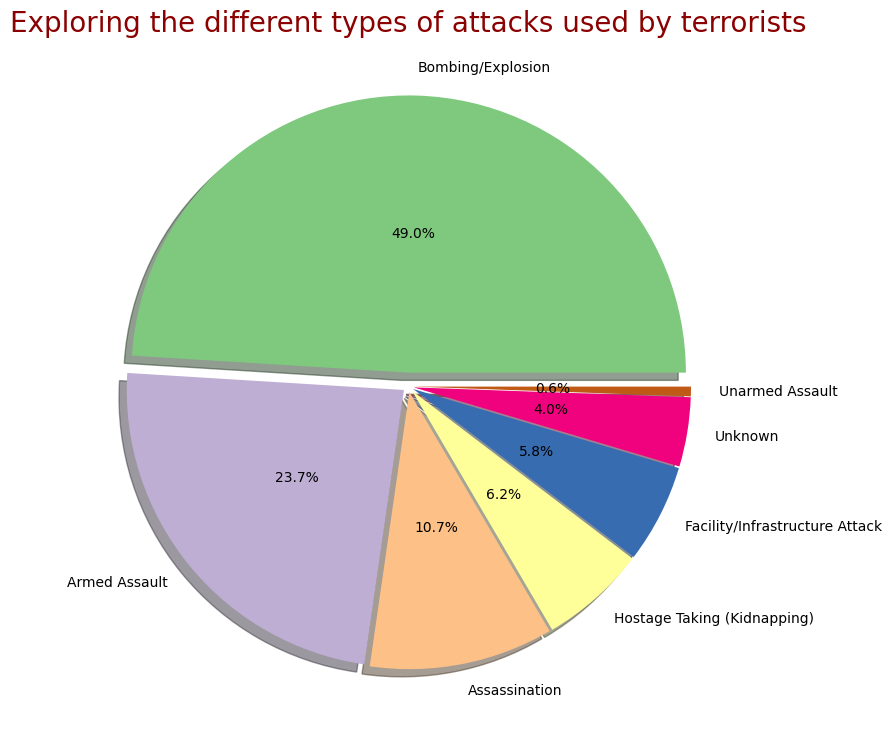

In [28]:
# Creating the figure size
plt.figure(figsize=(13,9))

# Choosing a color palette
colors = sns.color_palette('Accent')

# Giving separtion among all different pie-pieces
explode_list = [0.05, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02]

# Creating dataframe of attack types
df = gt_df['Attack_Type'].value_counts().head(7)

# Plotting a pie chart
plt.pie(df, labels=df.index, autopct='%1.1f%%',explode=explode_list, pctdistance=.5, colors=colors, shadow=True)

# Giving a proper title & showing the plot
plt.title("Exploring the different types of attacks used by terrorists",fontsize=20,color='Darkred')
plt.show()

## **Observations & Inferences :**

As we can see from above pie chart that the terrorists used bombing or explosions as their favourite type of attack. Nearly 50% (48.6) attacks are made by using explosions. This is followed by Armed Assault (23.5%) & Assassination (10.6%).

## **1.2 How different type of attacks affected the victims of terrorism as per their Nationality**

Here we dig more deeper into the victims of terrorism as per their Nationality & different Attack Types used by terrorists. In short which attack killed most number of citizens as per their nationality.

In [29]:
#Creating a dataframe with the different type of attacks affected the victims of terrorism as per their Nationality
nation_df = gt_df.groupby(['Nationality', 'Attack_Type'])['Casualty'].count().unstack('Attack_Type').dropna()

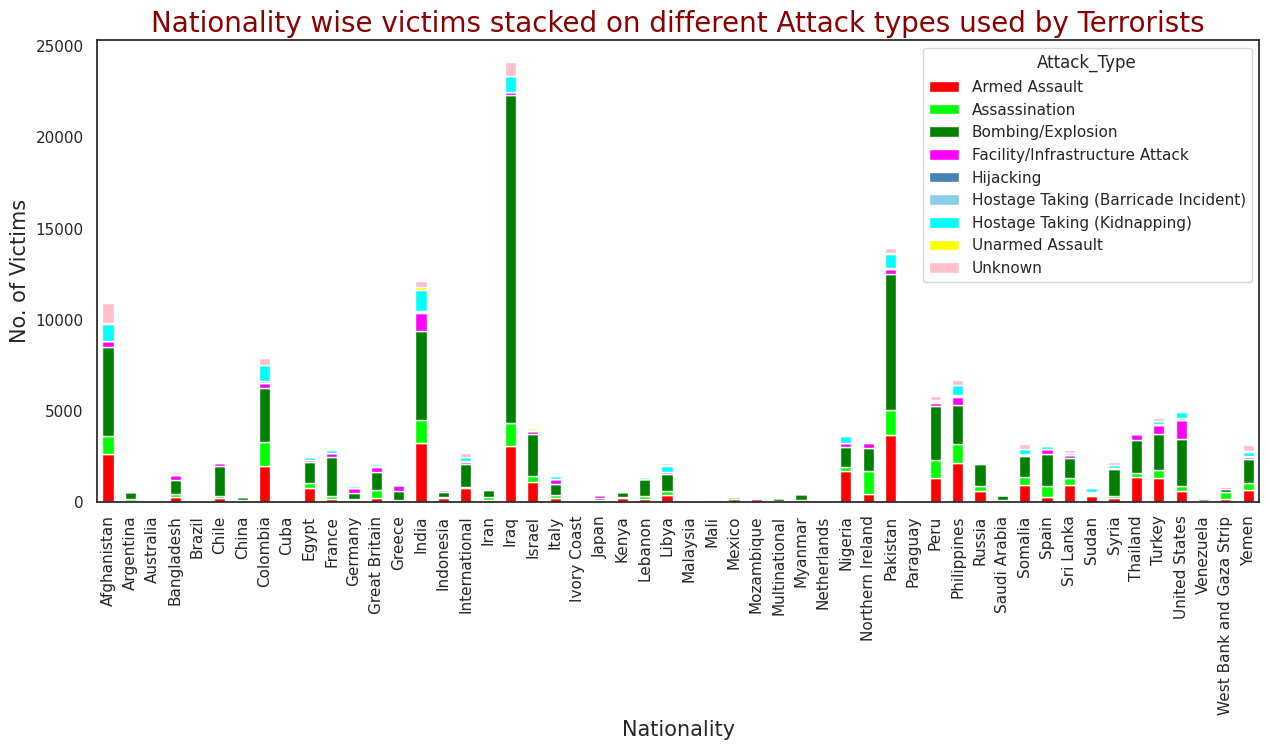

In [30]:
#set seaborn plotting aesthetics
sns.set(style='white')

#create stacked bar chart
ax = nation_df.plot(kind='bar', stacked=True, color=['red', 'lime', 'green', 'fuchsia', 'steelblue','skyblue', 'aqua', 'yellow', 'pink'])

#rotate x-axis labels
plt.xticks(rotation=90)

#add axis titles
plt.ylabel('No. of Victims',fontsize= 15)
plt.xlabel("Nationality",fontsize= 15)

#add overall title
plt.title("Nationality wise victims stacked on different Attack types used by Terrorists",fontsize= 20,color='Darkred')

# Set plot size
plt.gcf().set_size_inches(15,6)

#Display the plot
plt.show()

## **Observations & Inferences :**

This is an elaborative analysis of Attack types as per victim's Nationality. From the previous pie chart of attack types we already know that the Bombing/Explosion is most favourable method of attack used by terrorists. This stacked bar helps us to identify following points--

1. Iraqi people are most affected by terrorism & the amount of Bombing or Explosion is maximum in Iraq than any other country in the world.

2. Pakistani people are also affected by Bombing but the maximum amount of Armed Assault is also prevalent in Pakistan.

3. Indians have seen Bombing & Armed Assault as well but the Facility/Infrastructure Attack in India is nearly same as USA. Maximum number of Indians & Americans are also Kidnapped Or Taken as Hostages.

## **2.1 Target Analysis**

Here we will explore the different types of targets which were chosen by terrorist to spread their terror activities. We will see the most favourite targets of terrorists.

In [31]:
# Percentage of Target type in overall targets
(gt_df['Target_Type'].value_counts().head(10)/gt_df.shape[0])*100

Private Citizens & Property       23.947801
Military                          15.401974
Police                            13.487735
Government (General)              11.713844
Business                          11.375907
Transportation                     3.742068
Utilities                          3.314969
Unknown                            3.246171
Religious Figures/Institutions     2.443709
Educational Institution            2.378764
Name: Target_Type, dtype: float64

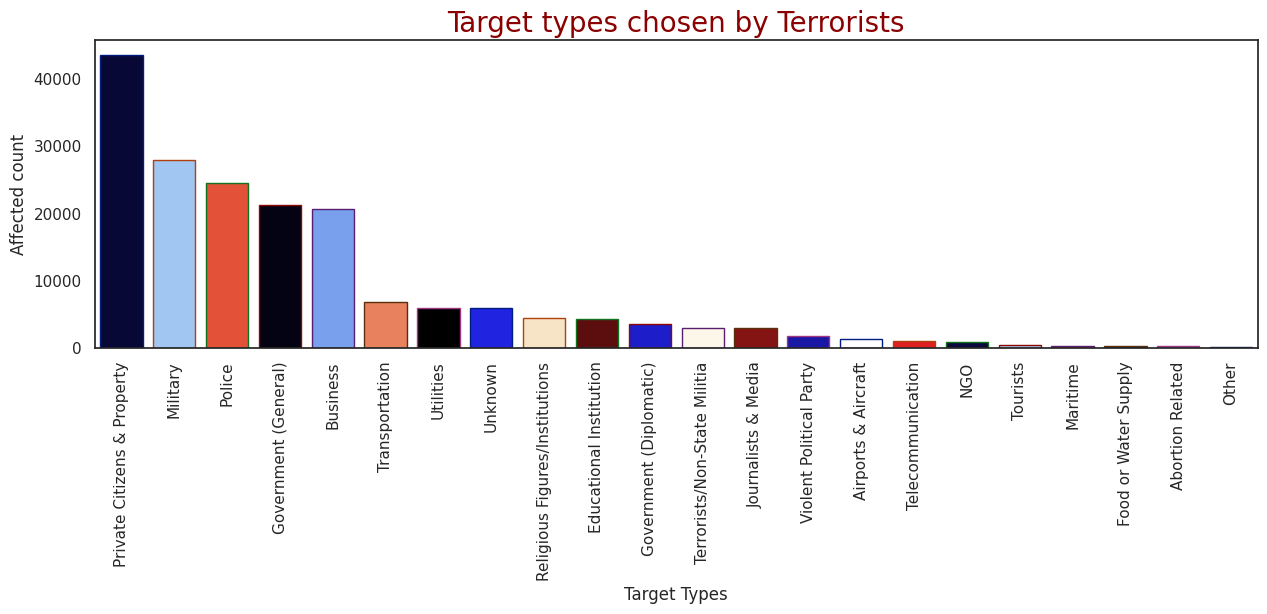

In [ ]:
# Creating the subplot & figure size.
plt.subplots(figsize=(15,4))

# Creating a countplot of target types chosen by Terrorists.
sns.countplot(x='Target_Type',data=gt_df ,palette='flag',order=gt_df.Target_Type.value_counts().index,edgecolor=sns.color_palette('dark',7))

# Giving a proper title, axis labels.
plt.title('Target types chosen by Terrorists',fontsize=20,color='Darkred')
plt.xlabel('Target Types')
plt.ylabel('Affected count')

# Rotating x-axis values for better visualisation
plt.xticks(rotation=90)

# Showing the plot
plt.show()

## **Observations & Inferences :**

The state of terrorist attacks is critical after 2010. The top five targets of terrorist attacks are citizens, the military, the police, governments, and businesses.

1. The most attacked target is 'Private Citizens & Property' which is approximately 25%.

2. Military, Police, Government and Business are of 10-20% attacked Targets

So, we can say that civilians were the targets most at risk, and their risk index was considerably higher than that of other targets.

## **2.2 Target Type Analysis on different regions**

Here we dig more deeper into the target type analysis based on different regions of the World. By this way we can explore & compare which establishments of the world is most affected as per region.


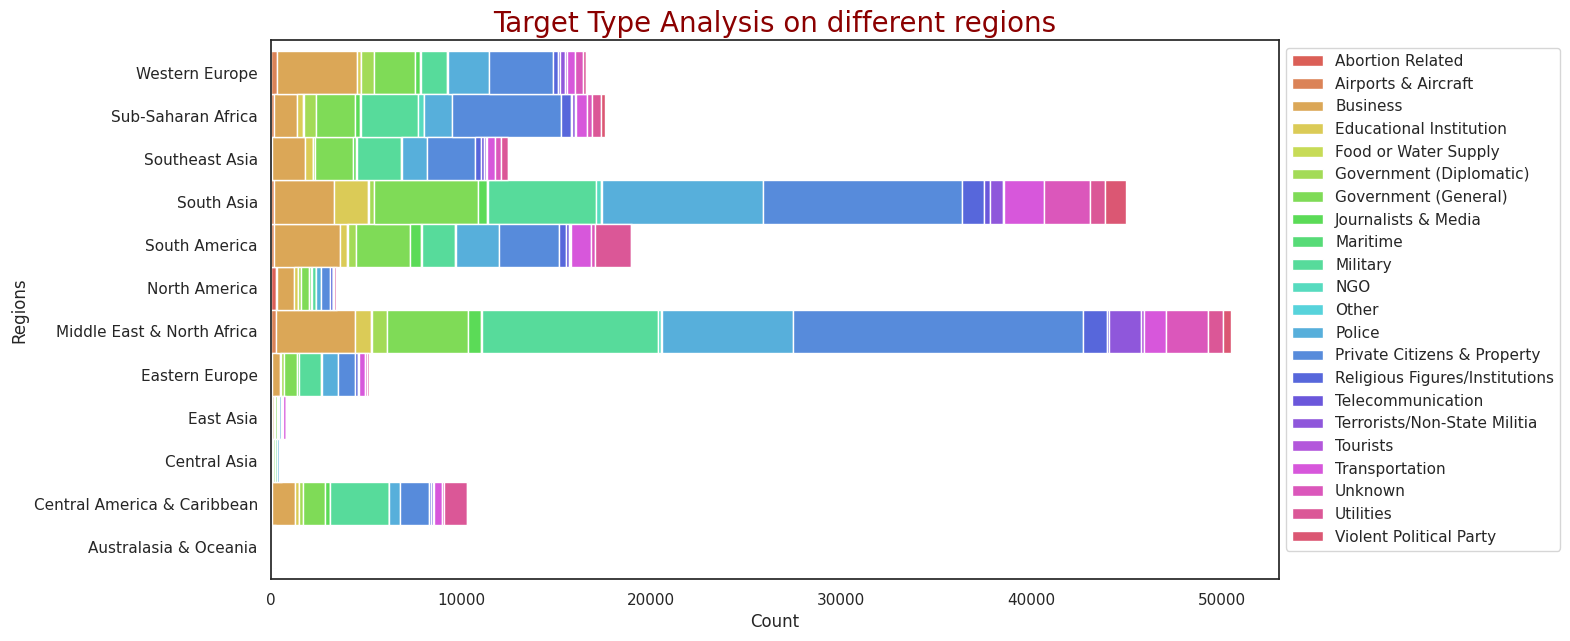

In [ ]:
# Plotting a crosstab analysis of Target types on different regions
pd.crosstab(gt_df.Region,gt_df.Target_Type).plot.barh(stacked=True,width=1,color=sns.color_palette('hls',22))

# Setting plot size
plt.gcf().set_size_inches(13,7)

# Adding axis & overall titles and adjusting legend location
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Target Type Analysis on different regions',fontsize=20,color='Darkred')
plt.xlabel('Count')
plt.ylabel('Regions')

# Showing the plot
plt.show()

## **Observations & Inferences :**

1. Middle East & North Africa is most affected region followed by South Asia.

2. In Middle East & North Africa, Private Citizens & Properties are favourite target followed by Millitary, Police, Government & Businesses. But in comparison with South Asia, here, the attacks on Private & Millitary are more in numbers.

3. In South Asia also Private Citizen & Properties are favourite targets followed by Police, Millitary, Government & Businesses. But here, the Police & Government attacks are more in number than Middle East & North Africa.

4. The targets of South America, Sub-Saharan Africa & Western Europe is nearly similar in nature. South America have the most Violent Political Parties all over in the world.

5. In Western Europe & Middle East-North Africa, nearly equal number of Businesses attacked, which is maximum in the world.

## **2.3 Distribution of Terrorist Attacks over Regions from 1970-2017**


In [ ]:
reg=pd.crosstab(gt_df.Year,gt_df.Region)
reg.head()

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,16,4,376
1973,1,6,0,2,1,19,64,83,1,2,4,290
1974,1,11,0,4,2,42,111,81,2,3,7,317


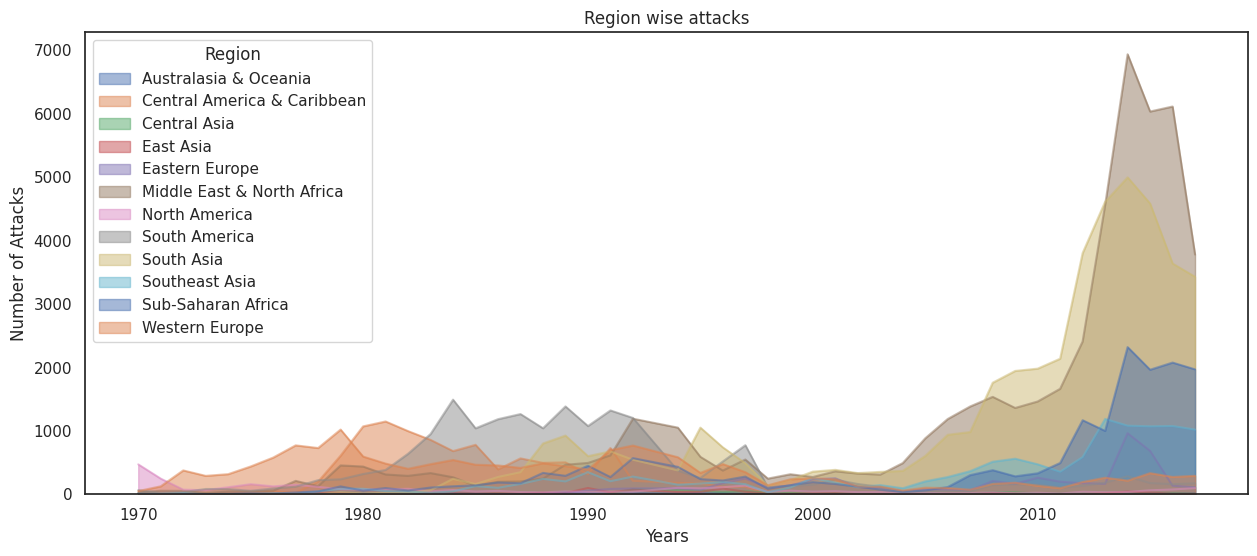

In [ ]:
reg.plot(kind="area", stacked=False, alpha=0.5,figsize=(15,6))
plt.title("Region wise attacks",fontsize=12)
plt.xlabel("Years",fontsize=12)
plt.ylabel("Number of Attacks",fontsize=12)
plt.show()

# **3. Terror Groups who kept kids as Hostage**

This analysis will give us a detailed view of terror groups who kept kids as their hostages.

In [ ]:
# Creating dataframe
kid=gt_df.groupby('Group_Name')['Kid_hostage'].count().sort_values(ascending=False).reset_index().head(11)
kid_df=kid.drop(axis=0,index=0)

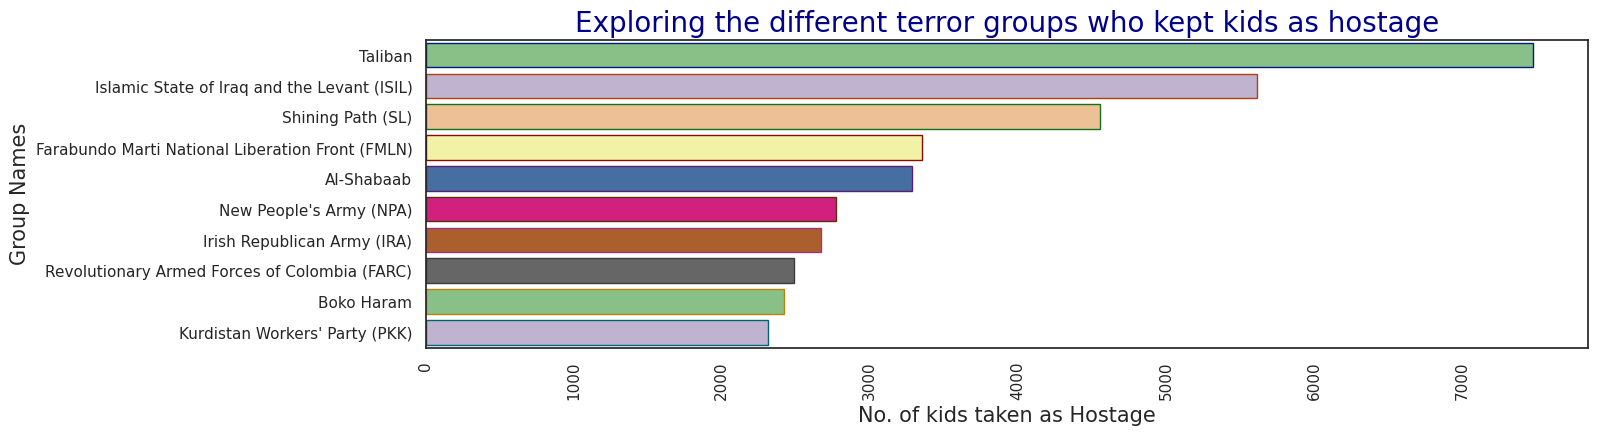

In [ ]:
# Creating the subplot & figure size.
plt.subplots(figsize=(15,4))

# Creating a barplot.
sns.barplot(x=kid_df['Kid_hostage'], y=kid_df['Group_Name'],  palette='Accent',edgecolor=sns.color_palette('dark',10),orient='h')

# Giving a proper title, axis labels.
plt.title('Exploring the different terror groups who kept kids as hostage',fontsize= 20,color='Darkblue')
plt.xlabel('No. of kids taken as Hostage',fontsize=15)
plt.ylabel('Group Names',fontsize = 15)

# Rotating x-axis values for better visualisation
plt.xticks(rotation=90)

# Showing the plot
plt.show()

## **Observations & Inferences :**

Here we can see that the Taliban's tops the list with more than 7000 kids were taken as hostages, followed by ISIL & Shining Path (Communist political party in Peru).

# **4. Analysis of terror attacks in INDIA**

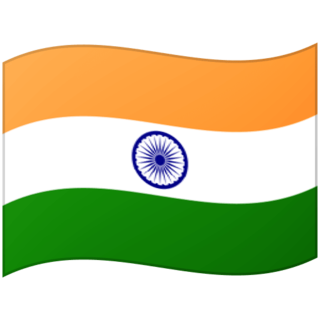


In this analysis we will explore different visualizations of terror attacks in India, like: most affected states, cities & we will also see which terror groups are most prevalent in India. We will see the most favourite targets of terrorists. We will also explore the most favourite attacking methods of terrorists & yearwise attacks starting from 1970 till 2017. At last we will be plotting an interactive visualization of terror attacks by locationwise (Latitude & Longitude) analysis in Indian subcontinent.

In [32]:
#Creating a dataframe with the dataset of India only
gt_india = gt_df[gt_df['Country'] == 'India']

In [33]:
#Dataframe of Top 10 states in India which were attacked by Terrorists:
indiastate_df = gt_india.groupby("State")['Killed'].count().sort_values(ascending=False).reset_index().head(10)

In [34]:
#Dataframe of Top 10 Cities in India which were attacked by Terrorists:
indiacity_df = gt_india.groupby("City")['Killed'].count().sort_values(ascending=False).reset_index().head(10)
city_df=indiacity_df.drop(axis=0, index=1)

In [35]:
#Dataframe of Top 10 Terrorist groups who killed most citizens
group_df = gt_india.groupby("Group_Name")['Killed'].count().sort_values(ascending=False).reset_index().head(10)
gr_df=group_df.drop(axis=0, index=0)

In [36]:
#Dataframe of Top 10 most attacked Targets in India
attack_df = gt_india.groupby("Attack_Type")['Killed'].count().sort_values(ascending=False).reset_index().head(10)

## **4.1 A comprehensive study of most attacked states & cities, notorious terrorist groups and most attacked targets in India.**

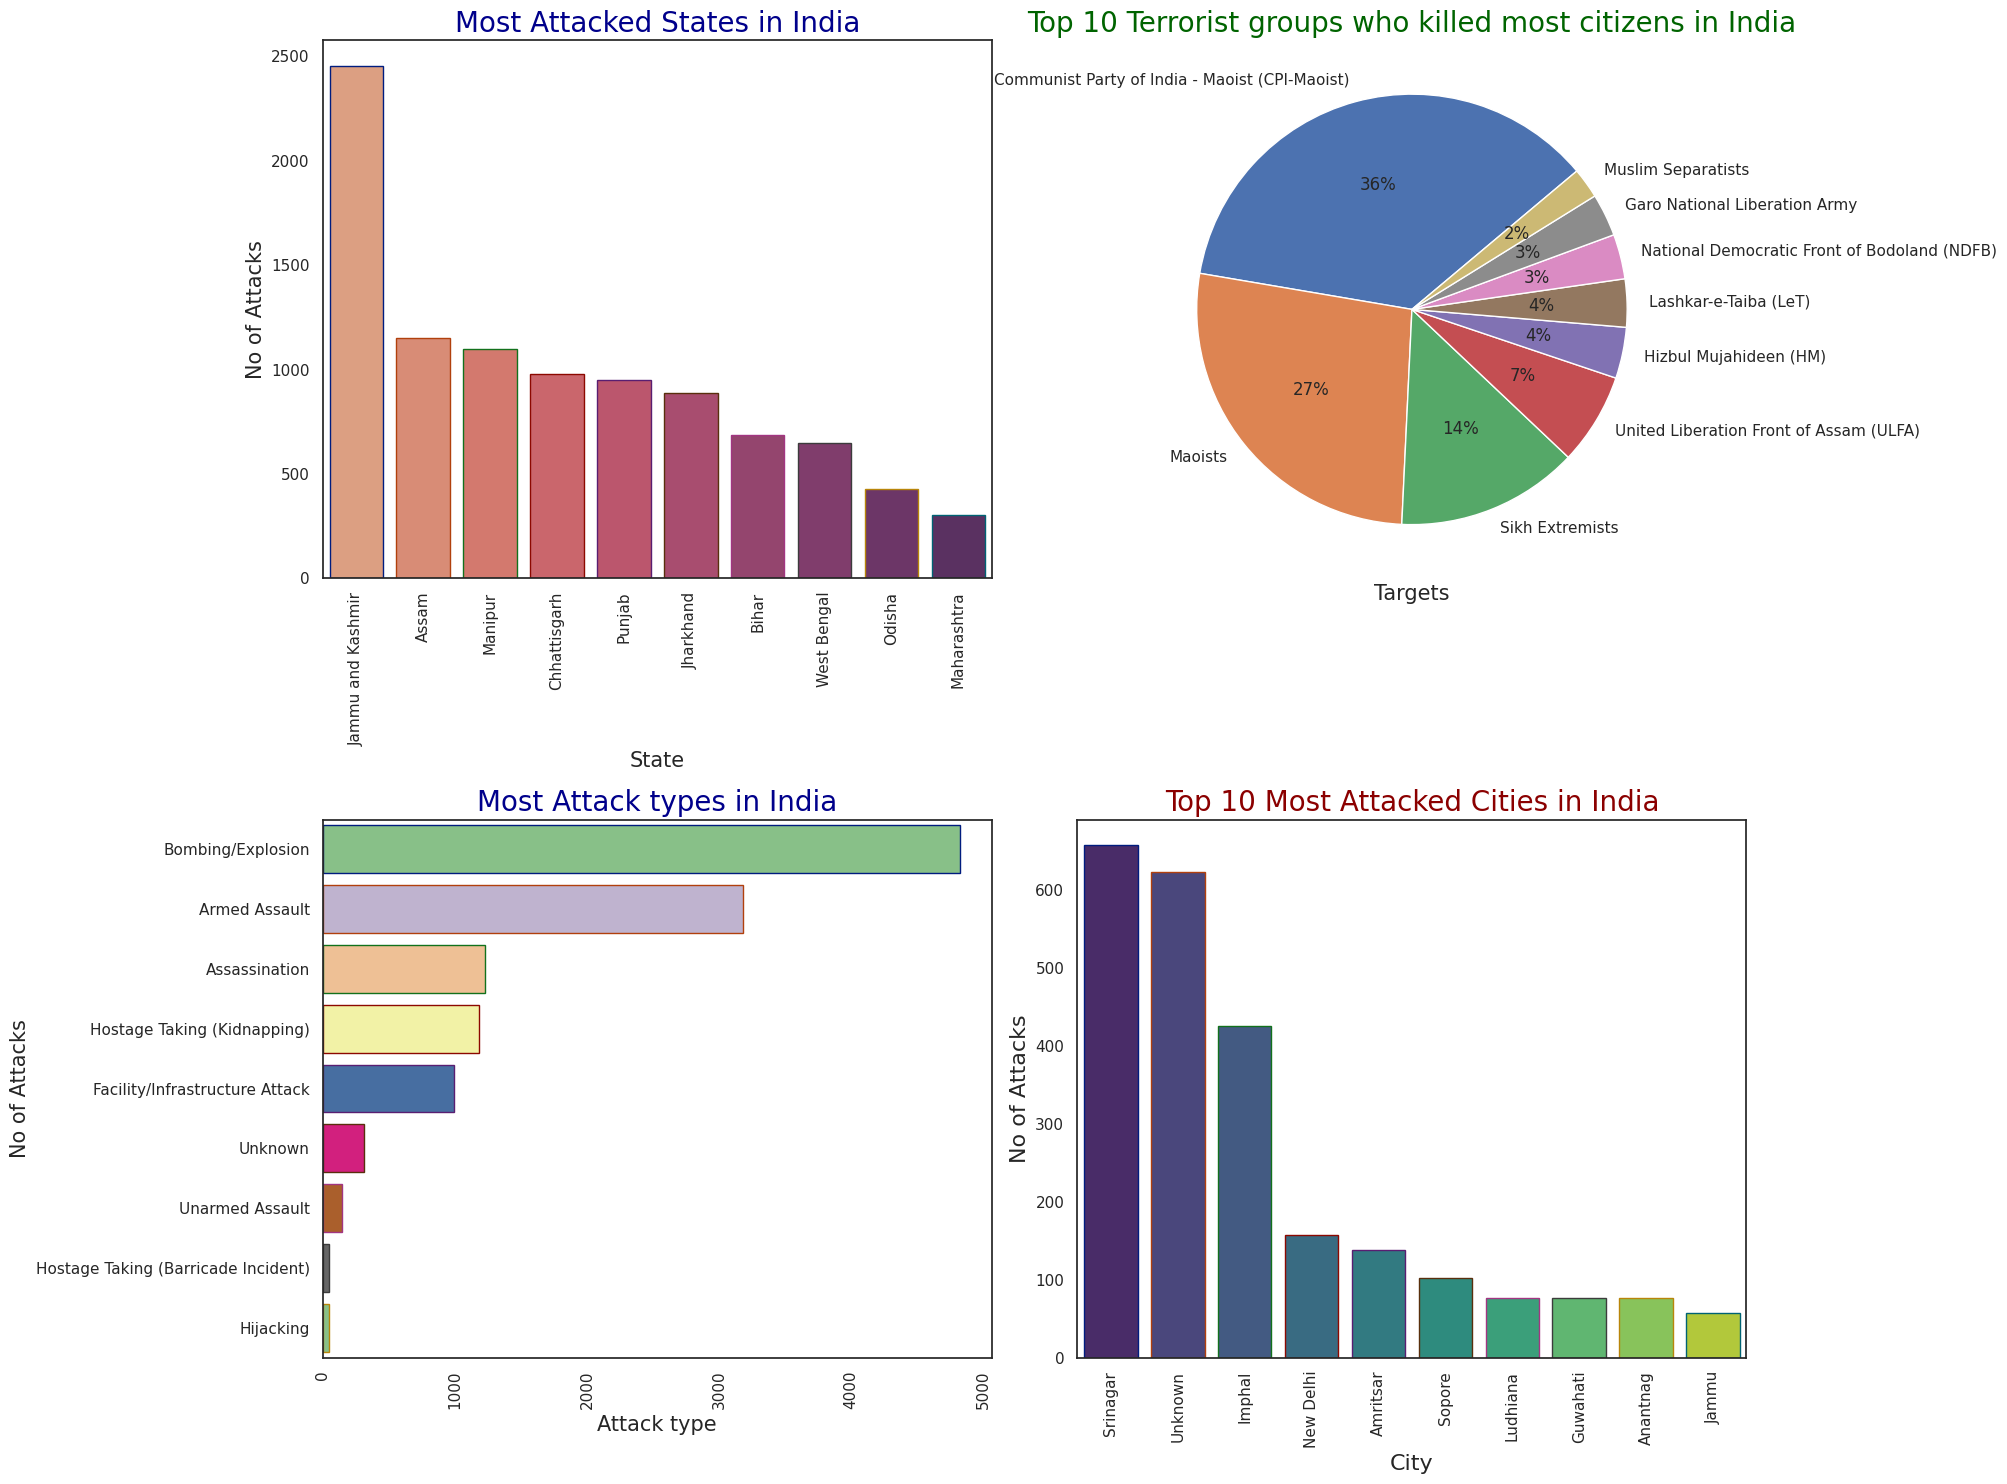

In [37]:
# Top 10 states in India which were attacked by Terrorists:
plt.subplot(2,2,1)
sns.barplot(x=indiastate_df['State'], y=indiastate_df['Killed'],  palette='flare',edgecolor=sns.color_palette('dark',10),orient='v')
plt.title("Most Attacked States in India",fontsize= 20,color='Darkblue')
plt.xlabel('State',fontsize=15)
plt.ylabel('No of Attacks',fontsize = 15)
plt.xticks(rotation=90)


# Top 10 Terrorist groups who killed most citizens:
plt.subplot(2,2,2)
xlabels = gr_df['Group_Name']
ylabels= gr_df['Killed']
plt.pie(ylabels,labels=xlabels,autopct='%.0f%%',startangle=40)
plt.title("Top 10 Terrorist groups who killed most citizens in India",fontsize=20,color='Darkgreen')
plt.xlabel("Targets",fontsize=15)


#Top 10 most attacked Targets in India
plt.subplot(2,2,3)
sns.barplot(x=attack_df['Killed'], y=attack_df['Attack_Type'],  palette='Accent',edgecolor=sns.color_palette('dark',10),orient='h')
plt.title("Most Attack types in India",fontsize=20,color='Darkblue')
plt.xlabel("Attack type",fontsize=15)
plt.ylabel("No of Attacks",fontsize=15)
plt.xticks(rotation=90)


# Top 10 Cities in India which were attacked by Terrorists:
plt.subplot(2,2,4)
sns.barplot(x=indiacity_df['City'], y=indiacity_df['Killed'],  palette='viridis',edgecolor=sns.color_palette('dark',10),orient='v')
plt.title("Top 10 Most Attacked Cities in India",fontsize= 20,color='Darkred')
plt.xlabel('City',fontsize=16)
plt.ylabel('No of Attacks',fontsize = 16)
plt.xticks(rotation=90)

# Set plot size
plt.gcf().set_size_inches(20,15)
plt.tight_layout()

# Display plot
plt.show()

## **Observations & inferences:**

1. 'Jammu and Kashmir' is the State with most Terror attacks in India succeeded by 'Assam' & 'Manipur'.

2. Most dangerous terrorist group in India is Communist Party of India-Maoists(CPI-M) followed by Maoists, Sikh_Extremists & ULFA.

3. The terrorists used bombs or explosions as their favourite type of attack succeeded by Armed Assault.

4. 'Srinagar' is the city with most attacks in India followed by 'Imphal' & 'New Delhi'.

## **4.2 Analysis of Terrorist attacks in India in the Year 2016**

Since 2016 was the most violent year in India because in this year, India has suffered the maximum number of Terrorist attacks, hence we will dig more deeper to analyse the Terrorist attacks in India in the Year 2016.

In [ ]:
# Condition to get the Attacks in india in the Year 2016
gt_ind_2016 = gt_df[(gt_df.Country=='India') & (gt_df.Year==2016)]

In [ ]:
# Dataframe of most attacked Terrorist Groups in India after dropping 'Unkowns' in the year 2016
gt_ind = gt_ind_2016.groupby('Group_Name')['Casualty'].count().sort_values(ascending=False).reset_index().head(10)
gt_ind2 = gt_ind.drop(axis=0, index=0)

In [ ]:
# Top 10 Cities in India which were attacked by Terrorists in the year 2016:
gt_city = gt_ind_2016.groupby('City')['Casualty'].count().sort_values(ascending=False).reset_index().head(10)

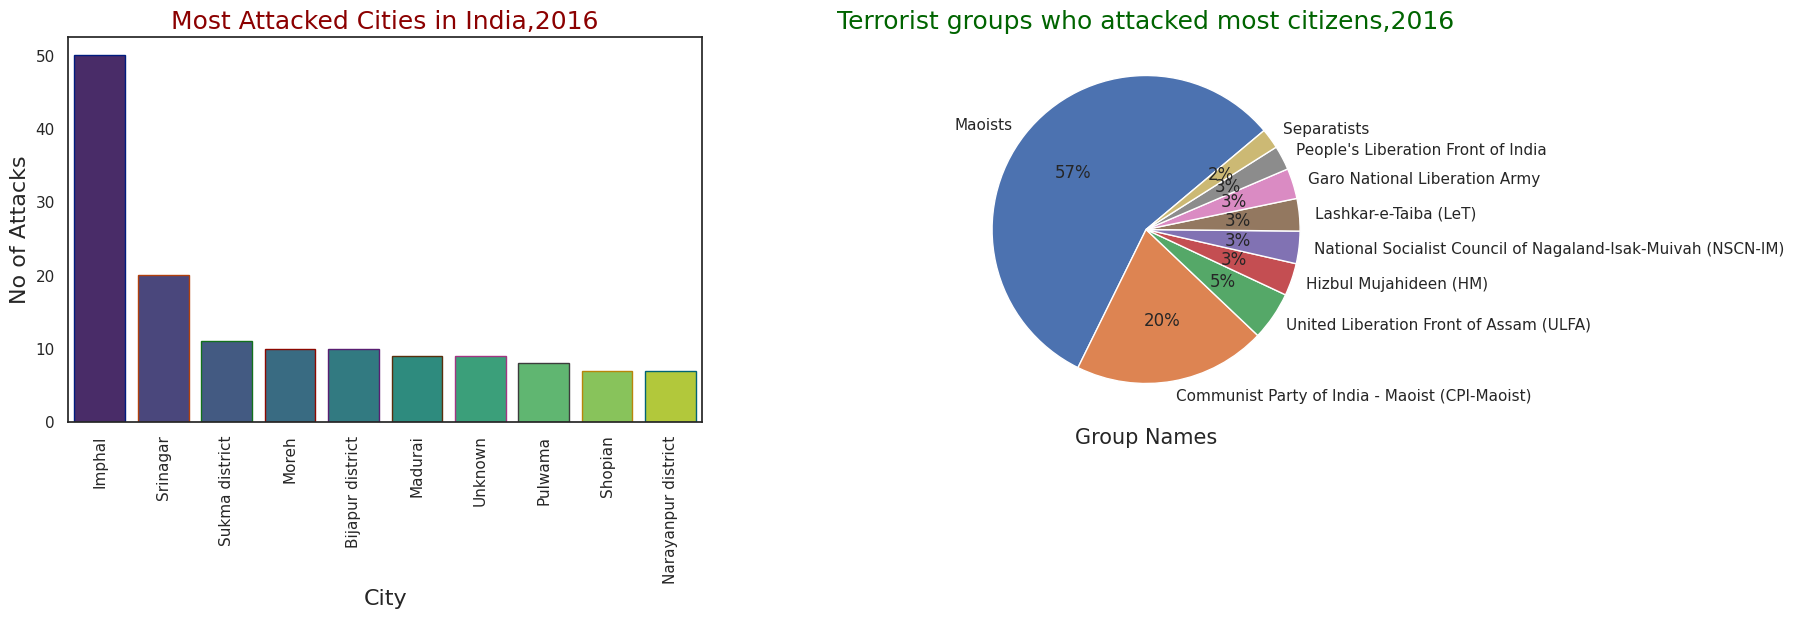

In [ ]:
# Top 10 Cities in India which were attacked by Terrorists in the year 2016:
plt.subplot(1,2,1)
sns.barplot(x=gt_city['City'], y=gt_city['Casualty'],  palette='viridis',edgecolor=sns.color_palette('dark',10),orient='v')
plt.title("Most Attacked Cities in India,2016",fontsize=18,color='Darkred')
plt.xlabel('City',fontsize=16)
plt.ylabel('No of Attacks',fontsize = 16)
plt.xticks(rotation=90)

# Top 10 Terrorist groups who killed most citizens in the year 2016:
plt.subplot(1,2,2)
xlabels = gt_ind2['Group_Name']
ylabels= gt_ind2['Casualty']
plt.pie(ylabels,labels=xlabels,autopct='%.0f%%',startangle=40)
plt.title("Terrorist groups who attacked most citizens,2016",fontsize=18,color='Darkgreen')
plt.xlabel("Group Names",fontsize=15)

# Set plot size
plt.gcf().set_size_inches(18,5)

# Display plot
plt.show()

## **Observations & Inferences :**

1. In 2016, India has suffered the most number of Terrorist attacks.

2. Maoists is the terrorist group responsible for most attacks in India in 2016 followed by CPI-M, ULFA & Hizbul Mujahideen.

3. Imphal is the city which was mostly attacked by Terrorists followed by Srinagar, Sukma District & Bijapur.

## **4.3 Analysis of Latitude & Longitude of location of Terror Attacks in India**

In [39]:
# Plotting Latitude & Longitude of location in India
fig = px.scatter_geo(gt_india,lat='Latitude',lon='Longitude',hover_name="City",color='State',projection='natural earth')
fig.update_layout(title='Terrorist Attacked Regions in India (1970-2017)',title_x=0.5)
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(height=400, margin={"r":0,"t":35,"l":0,"b":0})
fig.show()

### **Observations & inferences :**

This is an interactive plotting of latitude & longitude locations of terror activities in India.

1. We can see the specific locations of terror attacks & how densely populated they are in the states of -- Jammu and Kashmir, Assam, Manipur, Chhattisgarh, Punjab, Jharkhand, Bihar, West Bengal, Odisha & Maharashtra.

2. We can also see that the minimum number of terror attacks happened in the states of -- Puducherry, Goa, Uttarakhand etc.


## **5. An Analysis of Top 40 worst Terror attacks (1978-2017)**

In [ ]:
#Dataframe of top 40 Worst Terror Attacks in History from 1978 to 2017
terror1 = gt_df.sort_values(by='Killed',ascending=False)[:40]
heatmap_data=terror1.pivot_table(index='Country',columns='Year',values='Killed')
heatmap_data.fillna(0,inplace=True)

Values are sorted by the top 40 worst terror attacks as to keep the heatmap simple and easy to visualize. The worst attacks are measured by number of casualities.

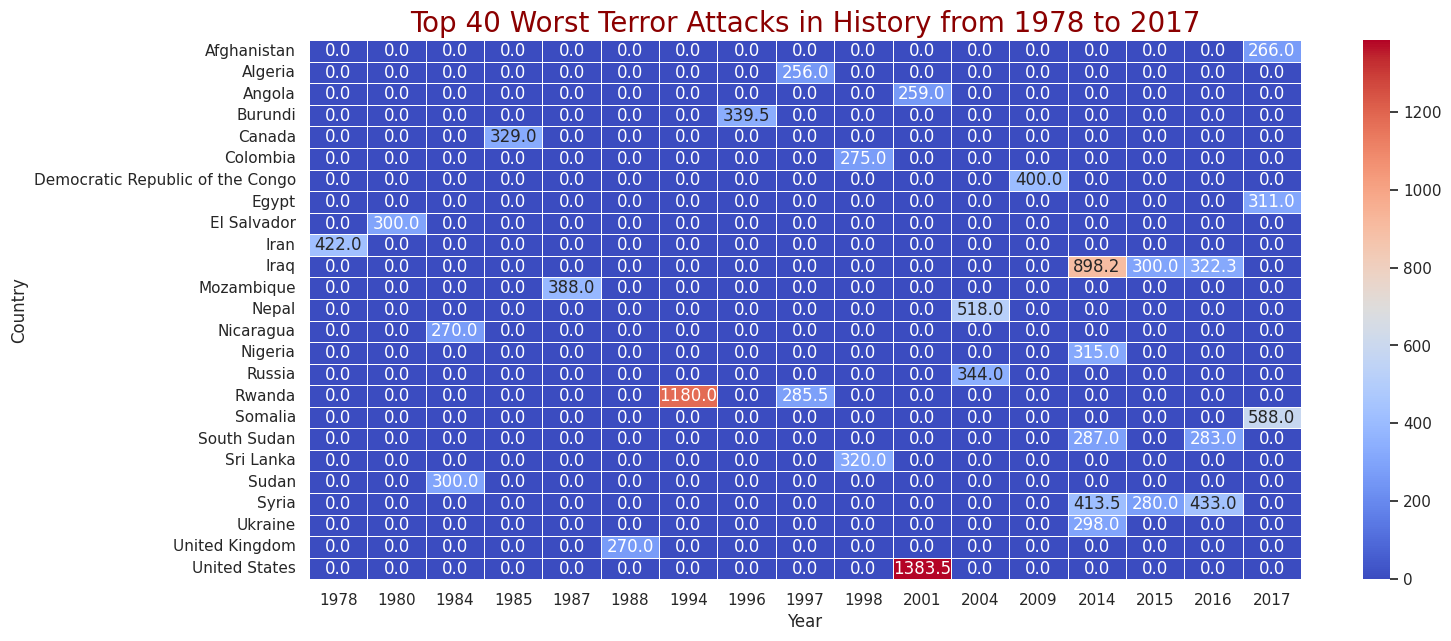

In [ ]:
# Set the size of the figure
plt.figure(figsize=(16, 7))

# Plot the heatmap
sns.heatmap(heatmap_data, cmap='coolwarm',annot=True, fmt=".1f", linewidth=.5)

# Set the title  of the plot & the labels for the axis
plt.title('Top 40 Worst Terror Attacks in History from 1978 to 2017',fontsize= 20,color='darkred')
plt.xlabel('Year')
plt.ylabel('Country')

# Display the plot
plt.show()

### **Observations & inferences :**

1. The most worst terror attack in the history of mankind is the 9/11 Attacks, where four coordinated suicide terrorist attacks carried out by the militant Islamist extremist network Al-Qaeda against the United States on September 11, 2001.

2. Second most worst terror attack was Rwanda genocide of 1994, planned campaign of mass murder in Rwanda that occurred in 1994. The genocide was conceived by extremist elements of Rwanda.

3. Third most worst terror attack was The War in Iraq. It was an armed conflict between Iraq and its allies and the Islamic State (also known as ISIS or ISIL) which began in 2013 and ended 2017.

4. The next worst attacks will be: In 2017, two truck bombings took place in Mogadishu, the capital of Somalia, killing at least 587 people; In 2004, Maoist attacks in Nepal.


# **5. Casualty Analysis.**

##**5.1 Demography of casualities by location.**


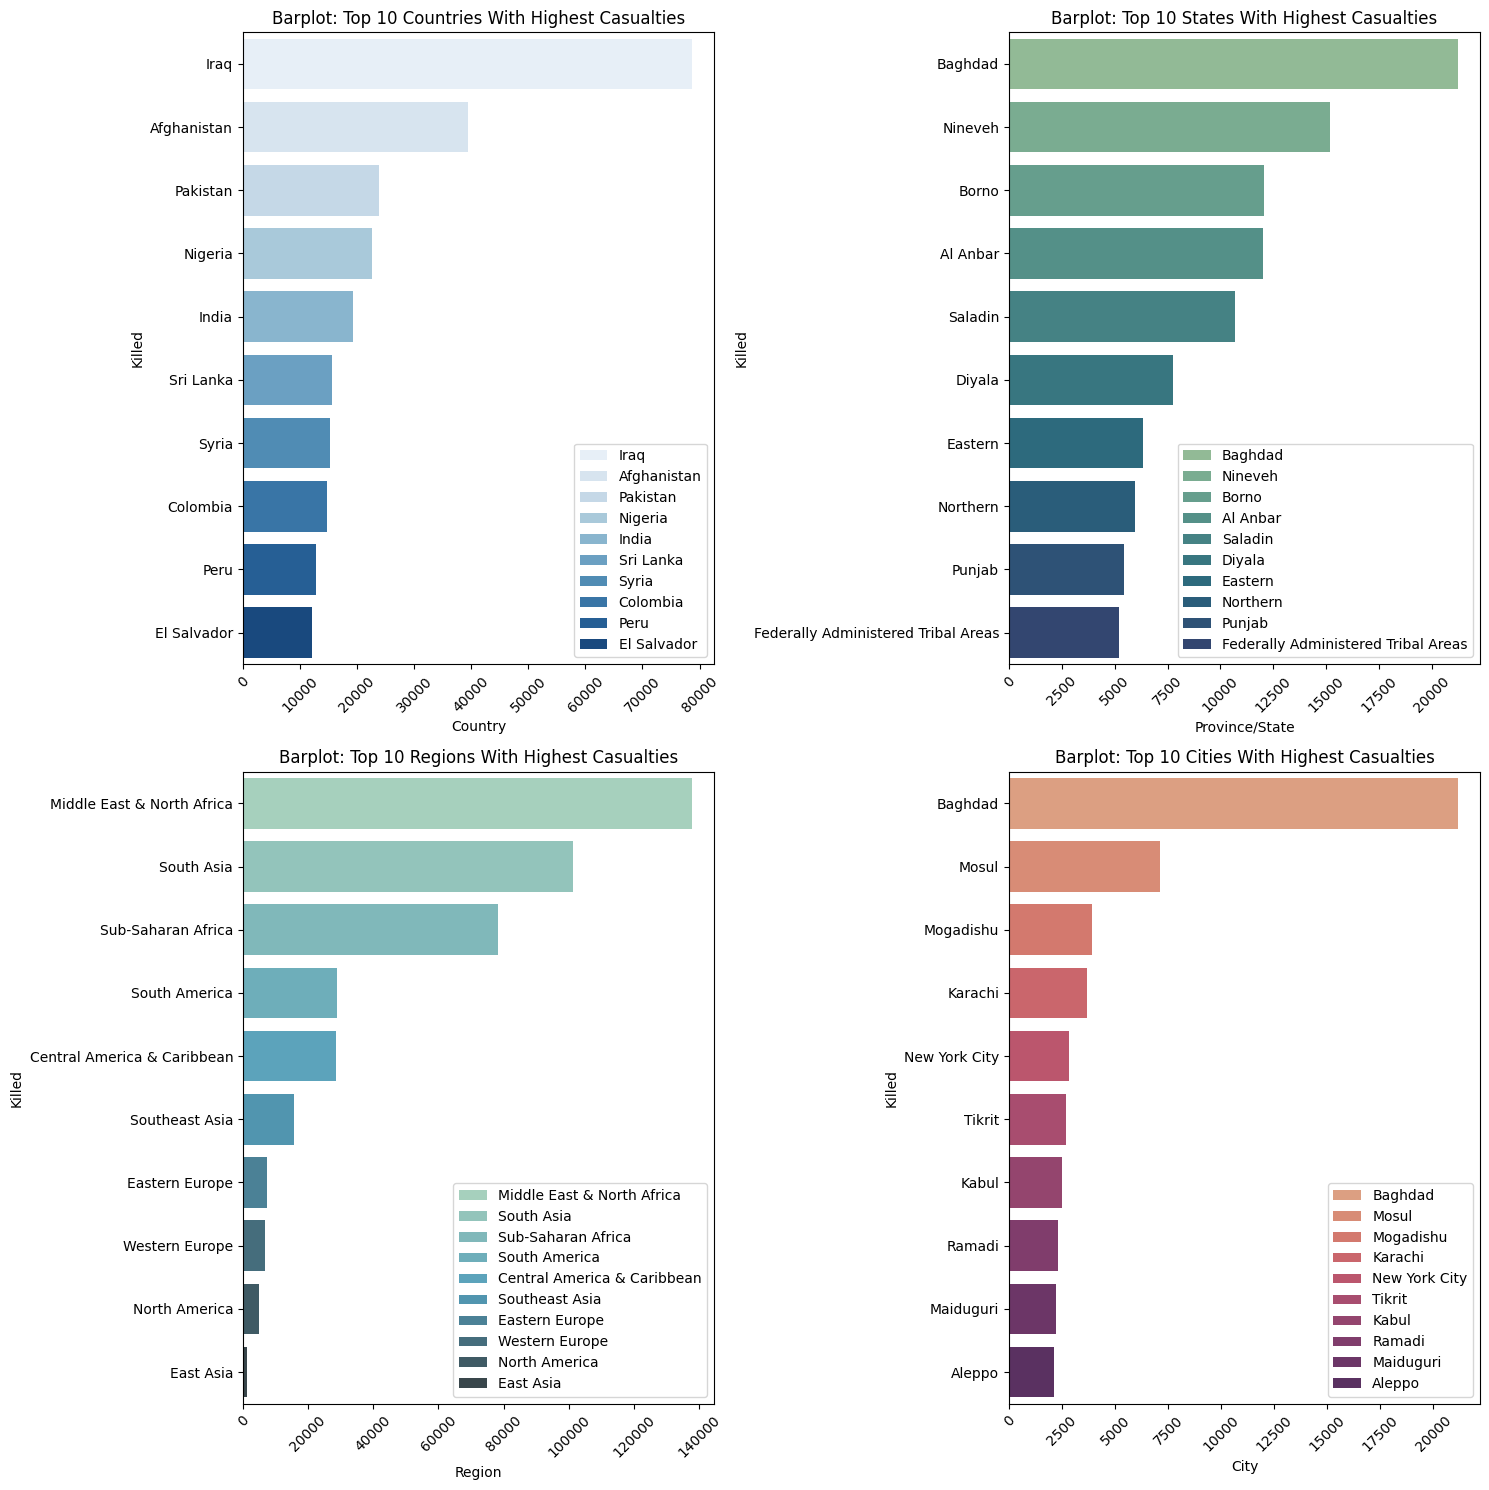

In [ ]:
# Prepare dataframes
top_countries = gt_df.groupby('Country')['Killed'].sum().nlargest(10)
top_countries = top_countries.drop('Unknown', errors='ignore')

top_regions = gt_df.groupby('Region')['Killed'].sum().nlargest(10)
top_regions = top_regions.drop('Unknown', errors='ignore')

top_states = gt_df.groupby('Province/State')['Killed'].sum().nlargest(11)
top_states = top_states.drop('Unknown', errors='ignore')

top_cities = gt_df.groupby('City')['Killed'].sum().nlargest(11)
top_cities = top_cities.drop('Unknown', errors='ignore')

# Add margins between subplots
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)

# Plot Subplot of Countries and add respective lables and tiltes
plt.subplot(2,2,1)
sns.barplot(y=top_countries.index, x=top_countries.values, label=top_countries.index, palette = 'Blues', orient = 'h')
plt.xlabel('Country')
plt.ylabel('Killed')
plt.title('Barplot: Top 10 Countries With Highest Casualties')
plt.xticks(rotation = 45)
plt.legend()
# Plot Subplot of States and add respective lables and tiltes
plt.subplot(2,2,2)
sns.barplot(y=top_states.index, x=top_states.values, label=top_states.index, palette = 'crest', orient = 'h')
plt.xlabel('Province/State')
plt.ylabel('Killed')
plt.title('Barplot: Top 10 States With Highest Casualties')
plt.xticks(rotation=45)
plt.legend()

# Plot Subplot of Regions and add respective lables and tiltes
plt.subplot(2,2,3)
sns.barplot(y=top_regions.index, x=top_regions.values, label=top_regions.index, palette = 'GnBu_d', orient = 'h')
plt.xlabel('Region')
plt.ylabel('Killed')
plt.title('Barplot: Top 10 Regions With Highest Casualties')
plt.xticks(rotation=45)
plt.legend()

# Plot Subplot of Cities and add respective lables and tiltes
plt.subplot(2,2,4)
sns.barplot(y=top_cities.index, x=top_cities.values,label=top_cities.index, palette = 'flare', orient = 'h')
plt.xlabel('City')
plt.ylabel('Killed')
plt.title('Barplot: Top 10 Cities With Highest Casualties')
plt.xticks(rotation=45)
plt.legend()

# Set plot size
plt.gcf().set_size_inches(15,15)
plt.tight_layout()

# Display plot
plt.show()

**Observation:**


1) Among the top 10 countries, **Iraq** has the **most casualties**, while **El Salvador** has the **fewest**.

2) Among the top 10 states, **Baghbad** has the **most casualties**, while **Punjab(India)** has the **fewest**.

3) Among the top 10 regions, the **Middle East and North Africa** have the **highest number** of casualties, while **East Asia** has the **fewest**.

4) Among the top 10 cities, **Baghdad** have the **highest number of casualties**, while **Maiduguri** has the **lowest**.


##**5.2 Demography of casualities by Terrorist Groups**


Text(0.5, 0, 'Percentage Of kills')

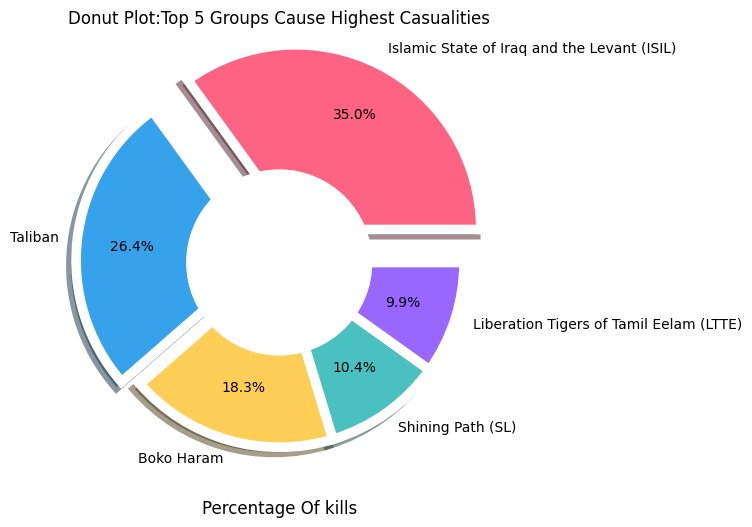

In [ ]:
# Prepare datafrme
most_kills = gt_df.groupby('Group Name')['Killed'].sum().sort_values(ascending = False)
most_kills = most_kills.drop('Unknown')


# Plot Pieplot
plt.figure(figsize = (6,6))
colors = ['#ff6384', '#36a2eb', '#ffce56', '#4bc0c0', '#9966ff']

plt.pie(most_kills.head(), labels = most_kills.head().index, autopct='%1.1f%%', shadow = True, explode = (0.2,0.1,0,0,0),
        wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' }, colors = colors, pctdistance= 0.7)

my_circle = plt.Circle((0,0), 0.5, color = 'white')
plt.gcf().gca().add_artist(my_circle)

# Add title
plt.title('Donut Plot:Top 5 Groups Cause Highest Casualities')
plt.xlabel('Percentage Of kills', fontsize=12)

**Observation:**

1) Among the top 5 terrorist groups **Lineration Tigers of Tamil Eelam(LTTE)** caused the **most** casualties of **35.0 percentage**. :

2) Among the top 5 terrorist groups **Islamic State of Iraq the Levant(ISIL)** caused the **least** casualties of **9.9 percentage**.



##**5.3 Demography of casualities by year**


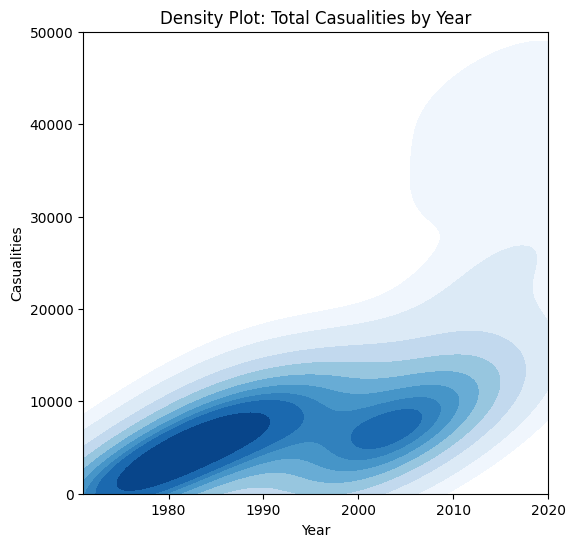

In [ ]:
# Prepare DF
year_kills = gt_df.groupby('Year')['Killed'].sum()
year_kills = year_kills.drop('Unknown', errors = 'ignore')

# Plot the KDE plot
plt.figure(figsize=(6, 6))
sns.kdeplot(data=year_kills, x=year_kills.index, y=year_kills.values, fill=True, cmap='Blues')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Casualities')
plt.title('Density Plot: Total Casualities by Year')

plt.xlim(1971, 2020)
plt.ylim(0, 50000)

# Show the plot
plt.show()

**Observation:**

1) From above plot we can conclude that **frequency of attack** was **more** in **mid 70's and mid 80's** but causeed **less** no of **casualities**.

2) we can also observe that though **frequency of attack** was **less** **after 2000** but caused alot **more casualities.**


## **5.4 Demography of Killed Vs Wounded**

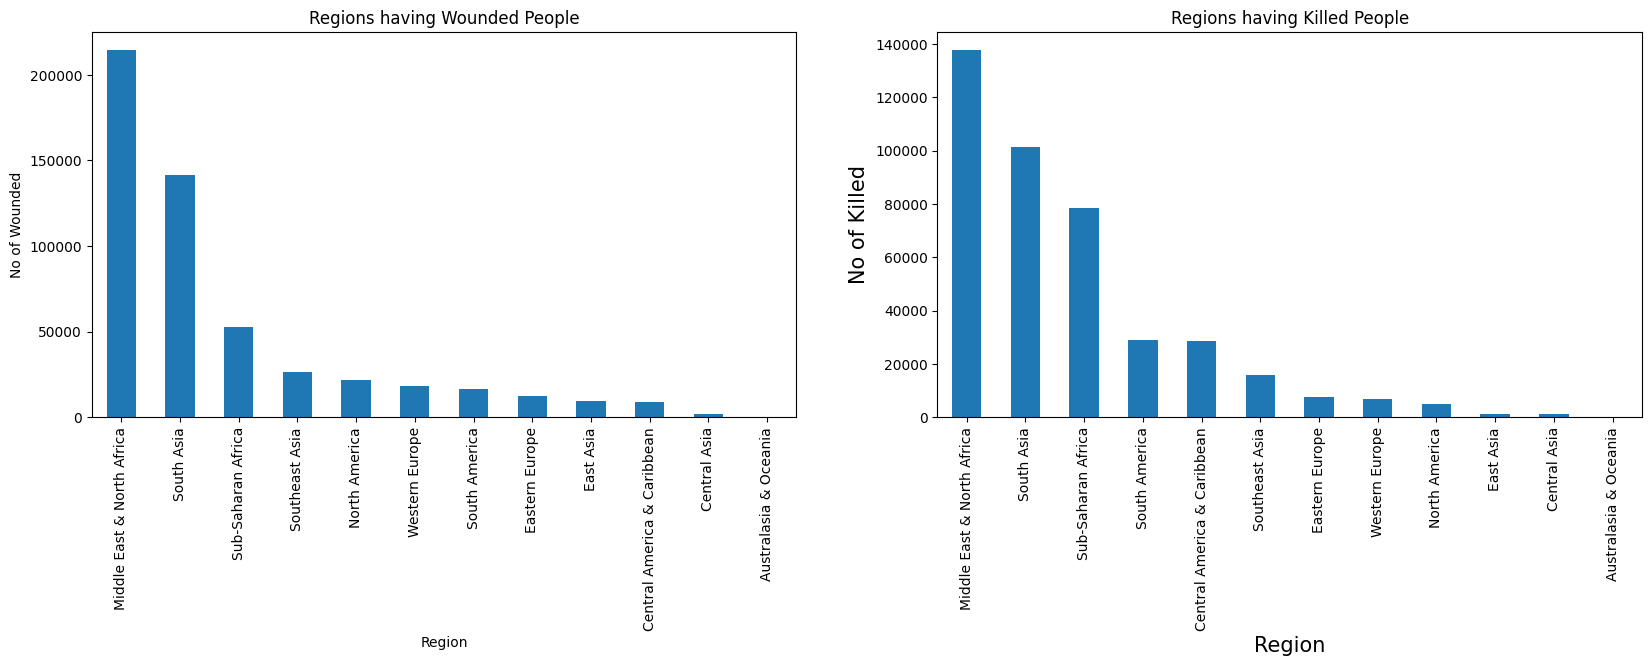

In [ ]:
plt.subplot(1,2,1)
gt_df.groupby(['Region'])['Wounded'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title("Regions having Wounded People")
plt.xlabel('Region')
plt.ylabel('No of Wounded')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
gt_df.groupby(['Region'])['Killed'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title("Regions having Killed People")
plt.xlabel('Region',fontsize=15)
plt.ylabel('No of Killed',fontsize =15)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(20,5)

**Observation:**

1) From above plot we can conclude that number of wounded people were highest in Region of **Middle East & North Africa** while low in **Central Asia**

2) we can also observe that the number of people killed were highest in the same region of **Middle East & North Africa** while low in **Central Asia**


# **6. Weaponery Analysis.**

##**6.1 Most and least weapons used in terror attack**


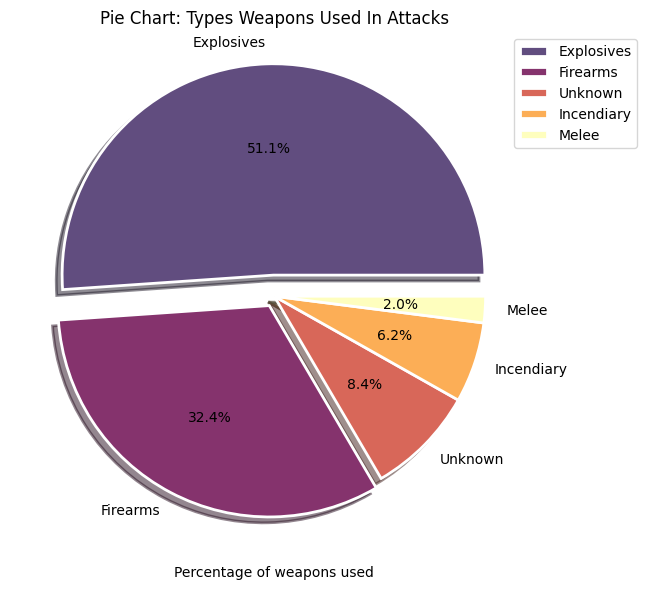

In [ ]:
# Prepare DataFrame
wp_df = gt_df['Weapon Type'].value_counts().sort_values(ascending=False)

# Create the subplots
plt.figure(figsize=(15, 7))

# Pie Chart
plt.subplot(1, 2, 1)
colors = [(0.382256, 0.300007, 0.499417),
          (0.520837, 0.199549, 0.428426),
          (0.848737, 0.405403, 0.348773),
          (0.98752, 0.683399, 0.335631),
          (0.997079, 0.998023, 0.746482)]

plt.pie(wp_df.head(), labels=wp_df.head().index, autopct='%1.1f%%', colors=colors,
        explode = (0.1,0.05,0,0,0), shadow = True,
        wedgeprops={'linewidth': 2, 'edgecolor': 'white'})
plt.title('Pie Chart: Types Weapons Used In Attacks')
plt.xlabel('Percentage of weapons used')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))

# Display plot
plt.show()

**Observation:**

1) Most used weapons used for terror attacks is **Explosive**, **Firearms** by **51.1 percent** and **32.4 percentage.**

2) Also there are **8.4 percent of Unknown weapons**



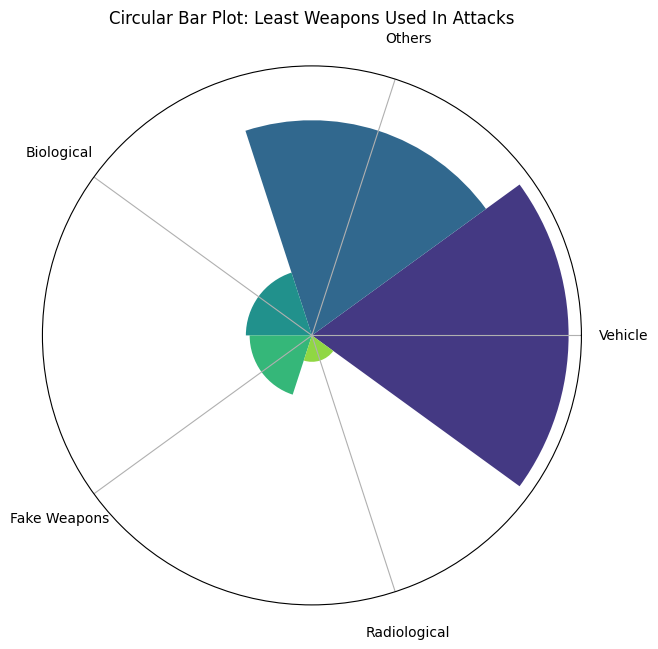

In [ ]:
import matplotlib.patches as mpatches

# Prepare DataFrame
wp_df = gt_df['Weapon Type'].value_counts().sort_values(ascending=False)

# Circular Bar Plot

x_label = ['Vehicle', 'Others', 'Biological', 'Fake Weapons', 'Radiological']

plt.figure(figsize=(7, 7))
plt.subplot(projection='polar')
bar_colors = sns.color_palette("viridis", len(x_label))
theta = np.linspace(0.0, 2 * np.pi, len(x_label), endpoint=False)
width = (2 * np.pi) / len(x_label)

bars = plt.bar(theta, wp_df.tail().values, width=width, bottom=0.0, color=bar_colors)
plt.title('Circular Bar Plot: Least Weapons Used In Attacks')
plt.xticks(theta, x_label)
plt.yticks([])  # Hide y-axis ticks

# Adjust the label positions
plt.setp(plt.gca().xaxis.get_majorticklabels(), rotation_mode='anchor', ha='center')
plt.gca().xaxis.set_tick_params(pad=20)  # Increase the distance of the labels from the plot by 10 pixels

# Display the plot
plt.show()


**Observation**

1) We can also observe **Radiological** and **Fake Weapons** were least used amongst all the weapons.

##**6.2 Weaponry impact before and after year 2000**


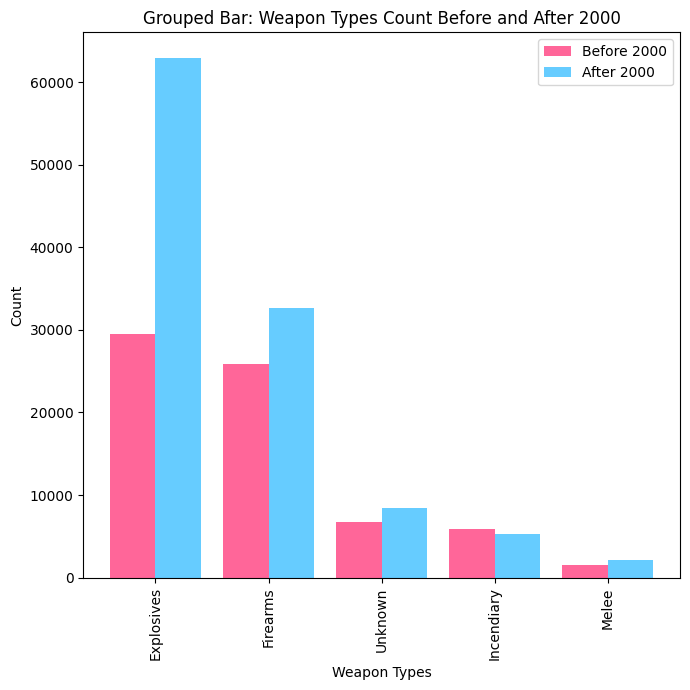

In [ ]:
# Prepare dataframe
wp_bf_2000 = gt_df[gt_df['Year'] < 2000]
wp_af_2000 = gt_df[gt_df['Year'] >= 2000]

count_bf_2000 = wp_bf_2000['Weapon Type'].value_counts().sort_values(ascending=False).head()
count_af_2000 = wp_af_2000['Weapon Type'].value_counts().sort_values(ascending=False).head()
weapon_types = count_bf_2000.index.unique()

# Set the width of the bars
width = 0.4

# Set the position of the bars on the x-axis
x = np.arange(len(count_bf_2000))

# Set figure size
plt.figure(figsize=(7, 7))

# Plotting the grouped bars
plt.bar(x - width/2, count_bf_2000, width, label='Before 2000', color='#ff6699')
plt.bar(x + width/2, count_af_2000, width, label='After 2000', color='#66ccff')


# Add labels, title, and legend
plt.xlabel('Weapon Types')
plt.ylabel('Count')
plt.title('Grouped Bar: Weapon Types Count Before and After 2000')
plt.xticks(x, weapon_types, rotation=90)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


**Observation:**

1) We can observe that with the **advancement** of the **technology**, the **access and exploitaion** of **Explosives** and **Firearms** increased significantly after year 2000.

2) Also we can observe that 3rd group bar is **Unknown** or we can say we don't access to that data but it also **significant growth**.

3) Usage of **Indendiary(fire)** slightly **decreased** after year 2000.



# **Conclusion**

Based on above visualizations & statistics, we have already seen a deep analysis and a thorough exploration of Global Terrorism in all over the World from 1970-2017. We have also seen an Indian perspective on Global Terrorism & how it affected our day to day lifes. Lastly, we can add that Exploratory Data Analysis is a very efficient way to make deep observations in the field of Global Terrorism. Different python libraries like pandas, numpy, matplotlib, seaborn, plotly are helped us to come to an end of our beautiful presentation of Global Terrorism.

From the above analysis we can conclude that,

1. 28.04 % of all events and a staggering 36.47 % of total casualties have been exclusive from the **Middle East and North African** region.

2. **Iraq** has been the county with highest number of attacks and 21.87% of all casualties have been from Iraq.

3. The huge rise in terror attacks in Iraq begun during 2004-2005 due to **ISIS**.

4. The analysis supports the result that count of attacks and count of casualties are directly proportional.

5. It has been seen that **explosives** have always been the weapon of choice for terror organisations for 47.7 % of all attacks.

6. **Private Citizens and military** have always been the biggest targets for terror organisations.

7. Among Attack types, hijacking and hostage takings have caused the highest average of casualties per attacks.

8. **Al-Qaida** has been the most lethal terror organisation, they have ended up causing 468.3 casualties per attacks.

9. **Baghdad** has been the most attacked city in the world, 7 of the 26 cities are in Iraq and 4 of the 26 cities are from Pakistan.

10. India is the country which have faced attacks from the highest number of terror organisations, followed by the US and Italy. Jammu and Kashmir' is the State with most Terror attacks in India succeeded by 'Assam' & 'Manipur & 2016 was the worst year.

Strong security should be given for the countries like Iraq, Pakistan, Afghanistan & India and also for Middle East Regions and cities like Bhagdad, Karachi and many others. Safety measures have to be take regarding explosive devices as bombing explosions are the most notorious attack type used by terrorists. Strong security is also needed to Private citizens and Property, Military,Police etc as they are main target in terrorism